# Quantum Fourier Transform

The Quantum Fourier Transform (QFT) is an important subroutine to many quantum algorithms, most famously Shor's algorithm for factoring and the quantum phase estimation (QPE) algorithm for estimating the eigenvalues of a unitary operator [1, 2]. The QFT can be performed efficiently on a quantum computer, using Hadamard gates, controlled phase shift gates and swap gates.

## Reference

[1] Wikipedia: https://en.wikipedia.org/wiki/Quantum_Fourier_transform

[2] More Details: https://young.physics.ucsc.edu/150/QFT-FFT.pdf

[3] Nielsen, Michael A., Chuang, Isaac L. (2010). Quantum Computation and Quantum Information (2nd ed.). Cambridge: Cambridge University Press.

In [11]:
from utils.notebook_plotting import plot_bitstrings_formatted
import matplotlib.pyplot as plt

%matplotlib inline

import math
import numpy as np
from braket.circuits import Circuit
from braket.devices import LocalSimulator

from braket.experimental.algorithms.quantum_fourier_transform import (
    quantum_fourier_transform as qft_module
)

# Circuit

![image info](./images/qft.png)

### Hints:
1) $H$ is the Hadamard gate, implemented using the function $\textbf{Circuit.h(qubit)}$. Circuit.h(0) applies Hadamard gate to the first input qubit ($x_1$ in the above sketch)

2) $R_{k}$ is the controlled phase gate with $R_{k}$ = 
$\begin{pmatrix}
    1 & 0 \\
    0 & e^{i2\pi / 2^k}
\end{pmatrix}$
where the rotation angle is defined by $2\pi / 2^k$. In the above sketch, circled $R_{k}$ is the operation acting on the target qubit, where the channel denoted with $\bullet$ is the control qubit.

3) $R_{k}$ is implemented using the function $\textbf{Circuit.cphaseshift(control_qubit, target_qubit, angle)}$. Circuit.cphaseshift(0, 2, 2$\pi$) applies 2$\pi$ rotation to third input qubit (target=2) using first input qubit (control=0) as control qubit.

In [15]:
def quantum_fourier_transform_circuit(num_qubits: int) -> Circuit:
    """Construct a circuit object corresponding to the Quantum Fourier Transform (QFT)
    algorithm, applied to the argument qubits.  Does not use recursion to generate the QFT.

    Args:
        num_qubits (int): number of qubits on which to apply the QFT

    Returns:
        Circuit: qft circuit
    """

    qft_circ = Circuit()
    qubits = list(range(num_qubits))
    
    # Loop over the qubits
    for k in range(num_qubits):
        # First add a Hadamard gate
        """
        write code here
        """

        # Then apply the controlled rotations, with weights (angles) defined by the distance
        # to the control qubit. Start on the qubit after qubit k, and iterate until the end.
        # IMPORTANT: Please ignore the swap operations, they are implemented as extra steps
        #            to our circuit implementation, in order to make it comparable to the QFT 
        #            algorithm within braket.
        for j in range(1, num_qubits - k):
            # define angle
            """
            write code here
            """
            # add controlled phase gate
            """
            write code here
            """

    # Then add SWAP gates to reverse the order of the qubits:
    for i in range(math.floor(num_qubits / 2)):
        qft_circ.swap(qubits[i], qubits[-i - 1])

    return qft_circ

# Evaluation

Evaluate your results:
- We implemented two test cases to implement your qft algorithm on. For the first one, we simple use $|0\rangle^{\otimes n}$ (all input channels are $|0\rangle$ state). For the second test case, we apply a state preparation circuit prior to qft. We therefore apply a hadamard gate to one of the input qubits (denoted by "h_tgt"). Try changing the "h_tgt" parameter and observe how the qft of the input state changes.
- Test your implementation by comparing the probability plots of your qft implementation and the groudtruth by braket. 

In [15]:
n_qubits = 4

## 1) Input without State Preparation

[0.0602 0.0613 0.0589 0.0636 0.0629 0.0627 0.063  0.066  0.066  0.0571
 0.0616 0.0638 0.0661 0.0595 0.0634 0.0639]


(0.0, 1.0)

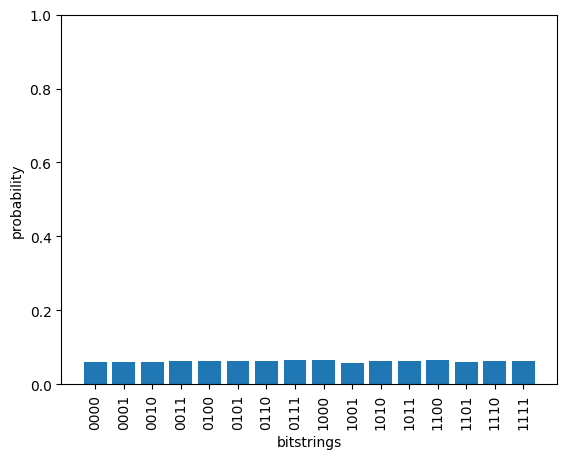

In [16]:
# Groundtruth
task = qft_module.run_quantum_fourier_transform(
    qubits=range(n_qubits), 
    n_shots=10000, 
    device=LocalSimulator()
)
probabilities = task.result().values[0]
print(probabilities)
plot_bitstrings_formatted(probabilities)
plt.ylim([0, 1])

[0.0651 0.0594 0.0616 0.0644 0.0628 0.0659 0.0629 0.0627 0.0632 0.0667
 0.063  0.0585 0.0611 0.0591 0.0635 0.0601]


(0.0, 1.0)

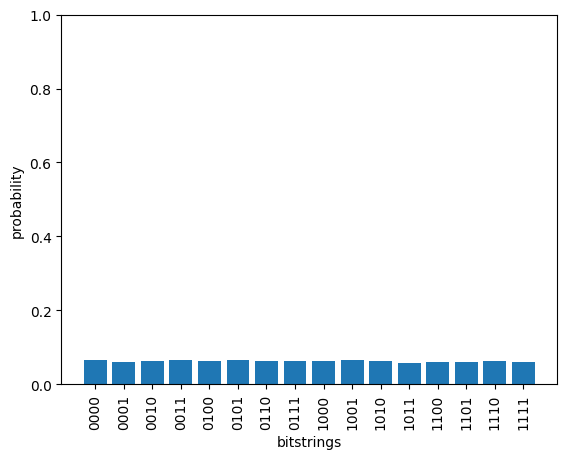

In [17]:
# Your implementation
circuit = quantum_fourier_transform_circuit(n_qubits)
device = LocalSimulator()

circuit.probability()
task = device.run(circuit, shots=10000)

probabilities = task.result().values[0]
print(probabilities)
plot_bitstrings_formatted(probabilities)
plt.ylim([0, 1])

## 1) Input with State Preparation

In [22]:
h_tgt = 2

[0.1287 0.1042 0.0622 0.0195 0.     0.0168 0.0657 0.1047 0.1201 0.1042
 0.0632 0.0191 0.     0.0206 0.0613 0.1097]


(0.0, 1.0)

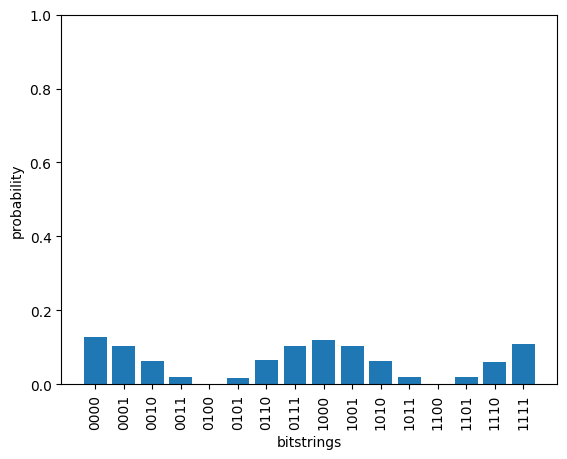

In [23]:
# Groundtruth
state_prep_circ = Circuit().h(h_tgt) # Applying Hadamard to the third input qubit

task = qft_module.run_quantum_fourier_transform(
    qubits=range(n_qubits), 
    n_shots=10000, 
    state_prep_circ=state_prep_circ, 
    device=LocalSimulator()
)

probabilities = task.result().values[0]
print(probabilities)
plot_bitstrings_formatted(probabilities)
plt.ylim([0, 1])

[0.1189 0.1115 0.063  0.0168 0.     0.0189 0.0656 0.1036 0.1234 0.1092
 0.0613 0.0179 0.     0.0169 0.0655 0.1075]


(0.0, 1.0)

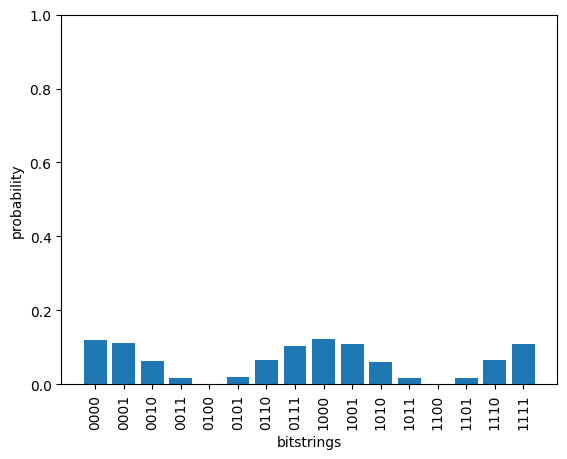

In [24]:
# Your implementation
circuit = state_prep_circ + quantum_fourier_transform_circuit(n_qubits)
device = LocalSimulator()

circuit.probability()
task = device.run(circuit, shots=10000)

probabilities = task.result().values[0]
print(probabilities)
plot_bitstrings_formatted(probabilities)
plt.ylim([0, 1])